In [2]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
np.random.seed(23)
pd.set_option('display.max_columns', None)

In [14]:
mobile_modelling = pd.read_csv('../Data/Data_modelling/mobile_modelling.csv')

X = mobile_modelling.iloc[:, 0:-1]
y = mobile_modelling.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
)

mobile_df = pd.concat([X_train, y_train], axis=1)

print(mobile_df.shape)

(980, 21)


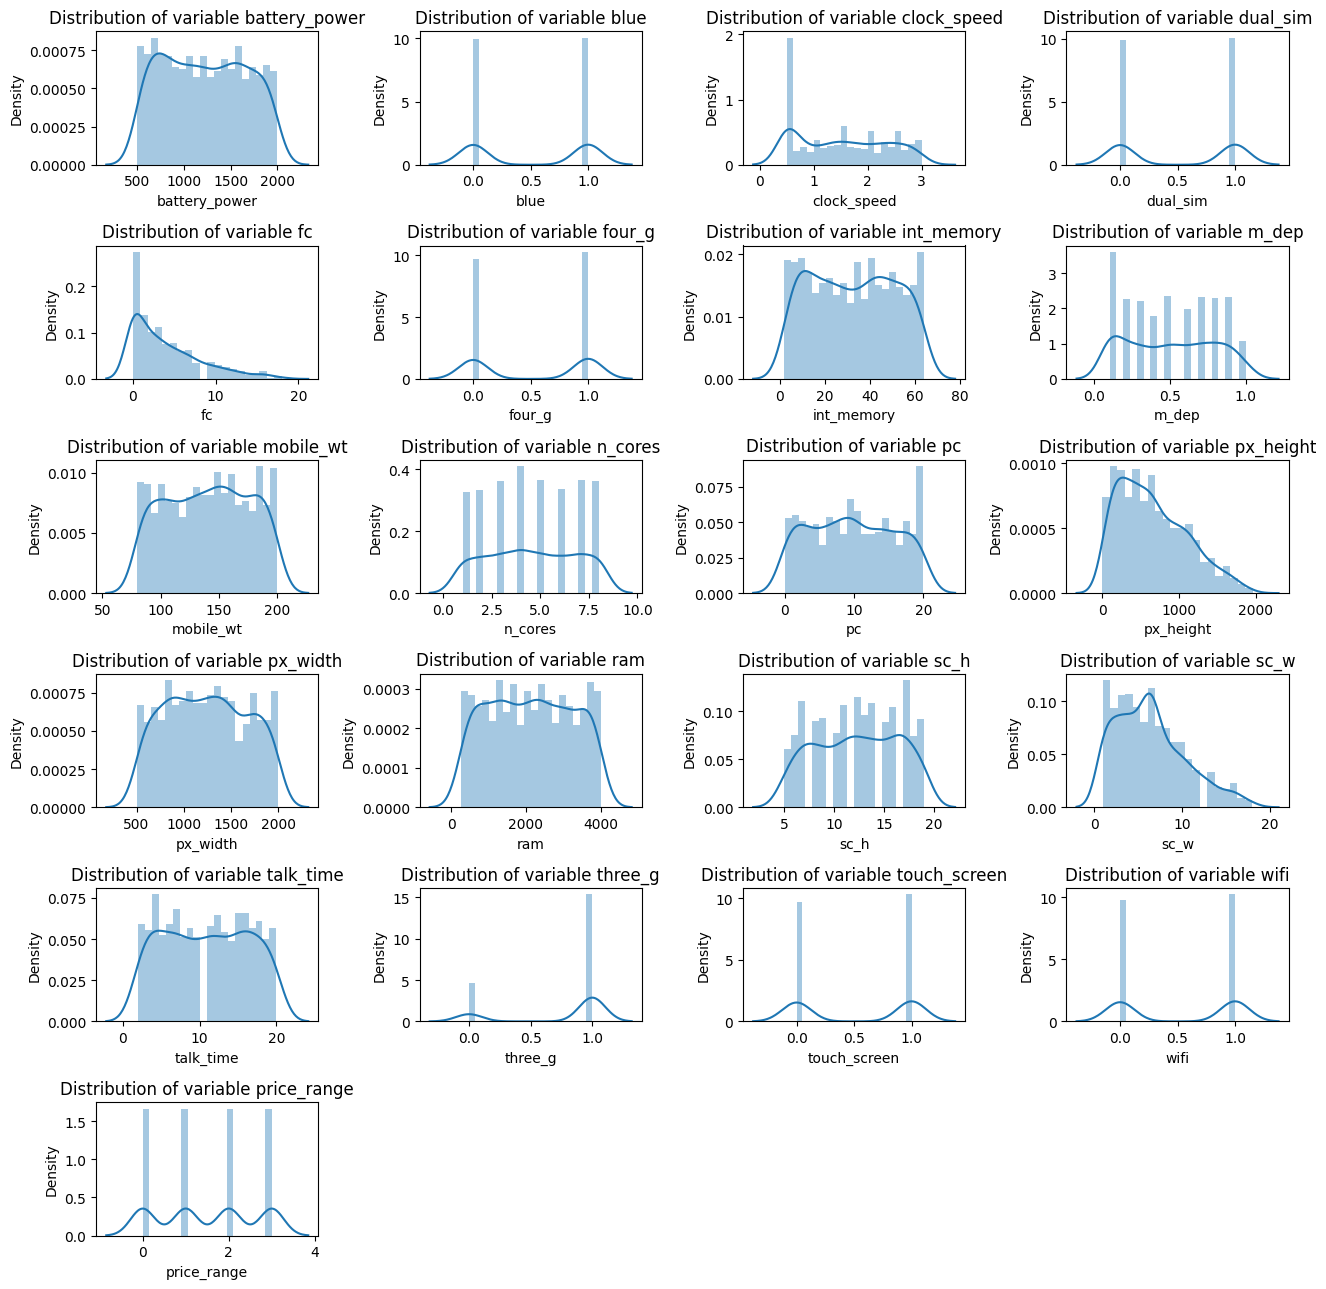

In [19]:
r = 6
c = 4

plt.figure(figsize=(13, 13))

for i, column in enumerate(train_df.columns):
    plt.subplot(r, c, i+1)
    dis_dist = sns.distplot(mobile_df[column], bins=20)
    dis_dist.set_title(f'Distribution of variable {column}')  

plt.tight_layout() 
plt.show()

# 1. Feature engineering

### Missing values

We don't have a problem with missing values, but we have 2 columns in which we have records with the value of 0, what doesn't make sense:

The first one is **px_height**. There is 1 record with the value of 0. So we decided to remove it from our dataset.

The second one is **sc_w**. In this case we have 124 records with a value of 0. Removing this amount of records could have an influence on our data and predictions. This is why we decided to try to replace missing values with a mean value from this column in dataset.


In [16]:
print("px_height with value of 0:")
print((mobile_df['px_height'] == 0).sum())

print("sc_w with value of 0:")
print((mobile_df['sc_w'] == 0).sum())

px_height with value of 0:
1
sc_w with value of 0:
94


In [17]:
mean_sc_w = mobile_df[mobile_df['sc_w'] != 0]['sc_w'].mean()
mobile_df['sc_w'] = mobile_df['sc_w'].replace(0, mean_sc_w)

- **encoding categorical variables**

    In our dataset we don't have any categorical variables that need encoding.
- **transforming variables**

    In our opinion, there is no need to transform any of the variables.
- **scaling/standarisation variables**

    SPRAWDZIĆ DLA JAKICH MODELI MA SENS A DLA JAKICH NIE
- **outliers**

    After removing missing values, we don't observe any outliers in our dataset.


# BOX COX???

# 2. Preliminary modelling

- dummy clasifier
- DecisionTreeClassifier
- logistic regression ???
- SVC
- random forest classifier
- GaussianNB

In [21]:
X_train = mobile_df.iloc[:, 0:-1]
y_train = mobile_df.iloc[:, -1]

### Random forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importances = model.feature_importances_
features = X.columns
forest_importances = pd.Series(importances, index=features).sort_values(ascending=False)
forest_importances

ram              0.467112
battery_power    0.076026
px_width         0.057708
px_height        0.055458
mobile_wt        0.039427
int_memory       0.037880
talk_time        0.032190
pc               0.030592
sc_w             0.029553
clock_speed      0.028856
sc_h             0.028498
m_dep            0.026579
n_cores          0.024210
fc               0.023903
touch_screen     0.008145
blue             0.007236
dual_sim         0.007207
four_g           0.007192
wifi             0.006383
three_g          0.005847
dtype: float64

After checking the importance of all the features, we will test models without taking some of the features into consideration.

### Dummy Clasifier

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

##### All the features

In [27]:
dc = DummyClassifier(strategy='uniform')
dc.fit(X_train,y_train)

y_pred = dc.predict(X_train)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.44      0.45        32
           1       0.23      0.29      0.26        31
           2       0.08      0.06      0.07        32
           3       0.25      0.26      0.25        31

    accuracy                           0.26       126
   macro avg       0.26      0.26      0.26       126
weighted avg       0.26      0.26      0.26       126



##### Features with importance value greater than 0.01

In [37]:
columns_to_drop_1 = ['touch_screen', 'blue', 'dual_sim', 'four_g', 'wifi', 'three_g']

X_train_1 = X_train.drop(columns=columns_to_drop_1)
print(X_train_1.shape)

(980, 14)


In [ ]:
dc = DummyClassifier(strategy='uniform')
dc.fit(X_train_1,y_train)

y_pred = dc.predict(X_test)

print(classification_report(y_test, y_pred))

##### Features with importance value greater than 0.02

##### Features with importance value greater than 0.05

##### RAM only